In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import & Explore Data

In [27]:

df = pd.read_csv('fcc-forum-pageviews.csv')

df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [29]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


# Clean & Format Data

In [30]:
rem_top_outliers = df['value'] <= df['value'].quantile(0.975)
rem_bot_outliers = df['value'] >= df['value'].quantile(0.025)

df = df[rem_top_outliers & rem_bot_outliers].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


# Visualize Data

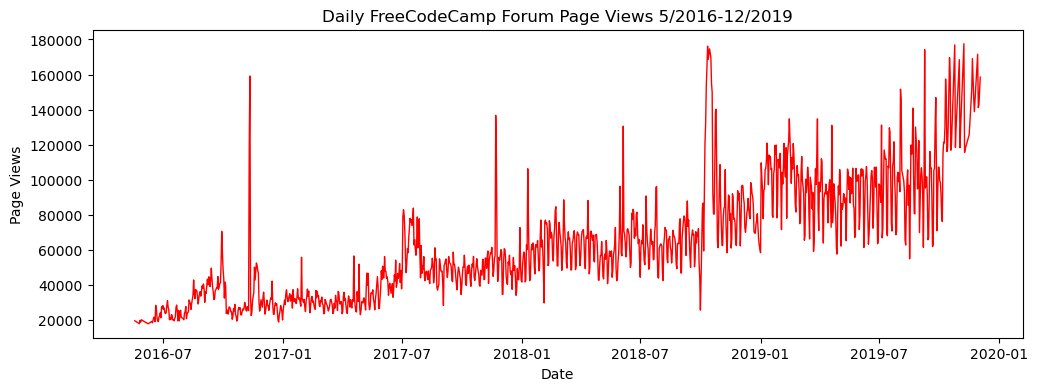

In [52]:
def draw_line_plot():
    
    # Draw line plot
    df['date'] = pd.to_datetime(df['date'])
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(df['date'], df['value'], color='r', linewidth=1)
    ax.set_title('Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.show()

draw_line_plot()



In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig